# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

In [3]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'largest-islands.csv'.

# from google.colab import files
# uploaded = files.upload()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
df.head()

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36


### Project Ideas

- What are the 10 largest islands in the tropics?

- What are the largest islands in each `region`?

- Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

- What islands are composed of multiple countries?
	- Hint: try `countries.str.contains(",")`

In [6]:
largest_islands = df.sort_values(by='area', ascending=False).head(10)
print("The 10 largest islands in the world are:")
print(largest_islands[['island', 'area', 'region', 'countries']])

The 10 largest islands in the world are:
                 island     area         region                    countries
41            Greenland  2166086         Europe                      Denmark
86           New Guinea   821400        Oceania  Papua New Guinea, Indonesia
23               Borneo   755000           Asia  Indonesia, Malaysia, Brunei
0            Madagascar   591896         Africa                   Madagascar
75        Baffin Island   507451  North America                       Canada
28              Sumatra   480793           Asia                    Indonesia
27               Honshu   227898           Asia                        Japan
69      Victoria Island   217291  North America                       Canada
43        Great Britain   209331         Europe               United Kingdom
83  Ellesmere (Nunavut)   196236  North America                       Canada


In [9]:
largest_by_region = df.loc[df.groupby('region')['area'].idxmax()]

print("The largest island in each region are:")
print(largest_by_region[['region', 'island', 'area', 'countries']])

The largest island in each region are:
           region                           island     area  \
0          Africa                       Madagascar   591896   
1       Antarctic                        Kerguelen     6200   
23           Asia                           Borneo   755000   
35        Eurasia                         Sakhalin    76400   
41         Europe                        Greenland  2166086   
75  North America                    Baffin Island   507451   
86        Oceania                       New Guinea   821400   
98  South America  Isla Grande de Tierra del Fuego    47992   

                      countries  
0                    Madagascar  
1       Antarctic Lands, France  
23  Indonesia, Malaysia, Brunei  
35                       Russia  
41                      Denmark  
75                       Canada  
86  Papua New Guinea, Indonesia  
98             Chile, Argentina  


In [14]:
# filter tropics
tropics_df = df[df['climate'] == 'tropics']

# sort by area in descending order
largest_tropics = tropics_df.sort_values(by='area', ascending=False).head(10)

print("The 10 largest islands in the tropics are:")
print(largest_tropics[['island', 'area', 'region', 'countries']])

The 10 largest islands in the tropics are:
        island    area         region                    countries
86  New Guinea  821400        Oceania  Papua New Guinea, Indonesia
23      Borneo  755000           Asia  Indonesia, Malaysia, Brunei
0   Madagascar  591896         Africa                   Madagascar
28     Sumatra  480793           Asia                    Indonesia
22    Sulawesi  188522           Asia                    Indonesia
21        Java  129438           Asia                    Indonesia
80        Cuba  109884  North America                         Cuba
26       Luzon  104688           Asia                  Philippines
14    Mindanao   94630           Asia                  Philippines
73  Hispaniola   76192  North America    Dominican Republic, Haiti


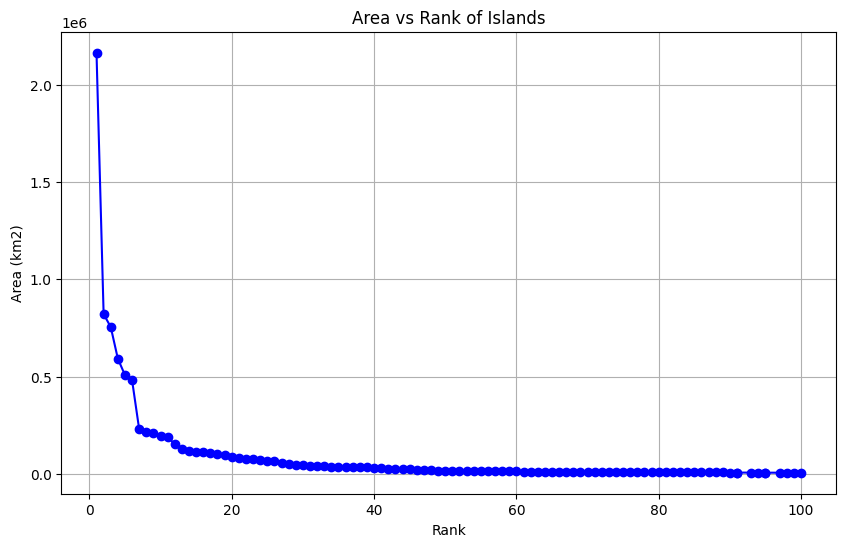

In [16]:
# Sort data by rank

df_sorted = df.sort_values(by='rank', ascending=False)

# Plot area vs rank
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['rank'], df_sorted['area'], marker='o', linestyle='-', color='b')
plt.title('Area vs Rank of Islands')
plt.xlabel('Rank')
plt.ylabel('Area (km2)')
plt.grid(True)
plt.show()

In [17]:
multiple_countries = df[df['countries'].str.contains(',')]

print("Islands composed of multiple countries:")
print(multiple_countries[['island', 'countries']])

Islands composed of multiple countries:
                             island                    countries
1                         Kerguelen      Antarctic Lands, France
23                           Borneo  Indonesia, Malaysia, Brunei
45                          Ireland      Ireland, United Kingdom
50                           Cyprus       Cyprus, United Kingdom
73                       Hispaniola    Dominican Republic, Haiti
86                       New Guinea  Papua New Guinea, Indonesia
98  Isla Grande de Tierra del Fuego             Chile, Argentina
